In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 

np.random.seed(1)
plt.style.use('seaborn')

In [39]:
# set params 
N, n_feature = 5000, 3
lr = 0.01 
epochs = 300
batch_size = 256
n_batch = N // batch_size

t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, 1))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

In [40]:
# generate dataset
x_data = np.random.normal(0, 1, (N, n_feature))
y_data = x_data @ t_W + t_b 
y_data = (y_data > 0).astype(np.int)


In [41]:
# training
J_track = list() 
acc_track = list() 

for epoch in range(epochs): 
    for batch_idx in range(n_batch):
        # get minibatch
        X = x_data[batch_idx * batch_size : (batch_idx+1) * batch_size]
        Y = y_data[batch_idx * batch_size : (batch_idx+1) * batch_size]

        # forward propagation
        z = X @ W + b
        pred = 1 / (1 + np.exp(-z))
        J0 = -(Y*np.log(pred) + (1-Y)*np.log(1-pred))
        J = np.mean(J0)
        J_track.append(J)

        # calculate accuracy
        pred_ = (pred > 0.5).astype(np.int)
        n_correct = np.sum((pred_ == Y).astype(np.int))
        acc = n_correct / batch_size
        acc_track.append(acc)

        # jacobians
        dJ_dJ0 = 1/batch_size * np.ones((1, batch_size))
        # print(pred.shape, Y.shape)
        # print(((pred - Y) / (pred * (1-pred))).flatten().shape)
        dJ0_dpred = np.diag(((pred - Y) / (pred * (1-pred))).flatten())  # BCCE
        # print(dJ_dJ0.shape, dJ0_dpred.shape)
        dpred_dz = np.diag((pred*(1-pred)).flatten())   # sigmoid function
        dz_dW = X
        dz_db = np.ones((batch_size, 1))
        # print(dJ_dJ0.shape, dJ0_dpred.shape)
        # print(dpred_dz.shape, dz_dW.shape, dz_db.shape)
        
        # back propagation 
        dJ_dpred = dJ_dJ0 @ dJ0_dpred
        dJ_dz = dJ_dpred @ dpred_dz
        dJ_dw = dJ_dz @ dz_dW
        dJ_db = dJ_dz @ dz_db
        # print(dJ_dw.shape, W.shape)
        # print(dJ_db.shape, b.shape)

        # parameter update
        W = W - lr*dJ_dw.T
        b = b - lr*dJ_db


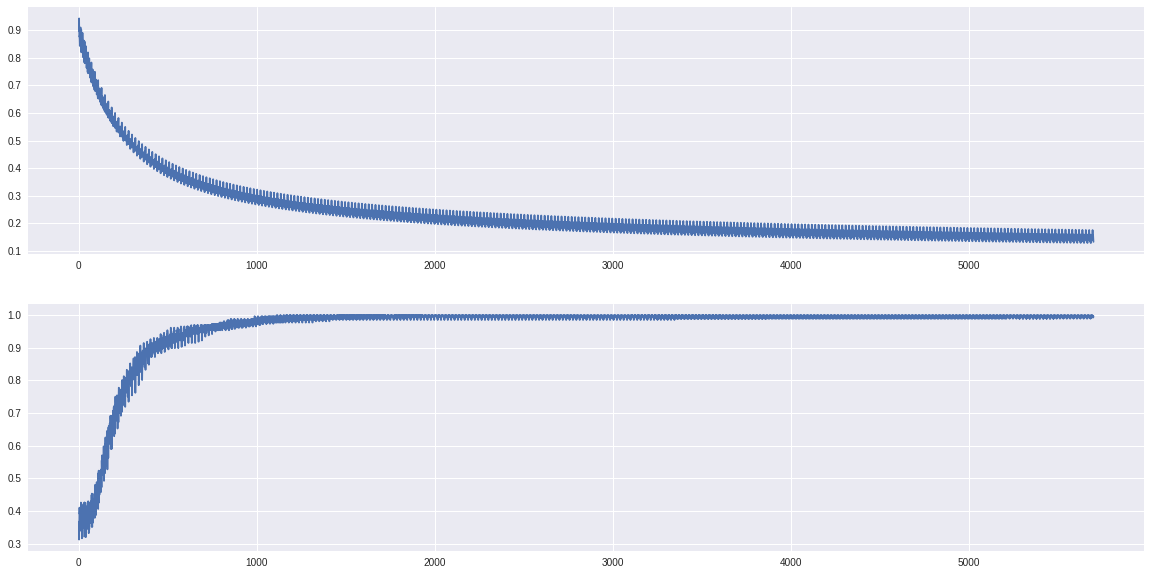

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[1].plot(acc_track)